# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | priargunsk
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | jayapura
Processing Record 15 of Set 1 | acapulco de juarez
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | nouadhibou
Processing Record 22 of Set 1 | kruisfontein


Processing Record 38 of Set 4 | charters towers
Processing Record 39 of Set 4 | eastbourne
Processing Record 40 of Set 4 | mermoz boabab
Processing Record 41 of Set 4 | bugene
Processing Record 42 of Set 4 | xai-xai
Processing Record 43 of Set 4 | mizdah
Processing Record 44 of Set 4 | homer
Processing Record 45 of Set 4 | tamanrasset
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | szczebrzeszyn
Processing Record 48 of Set 4 | puerto madero
Processing Record 49 of Set 4 | holbrook
Processing Record 0 of Set 5 | concepcion
Processing Record 1 of Set 5 | xiaoshi
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | zouerate
Processing Record 4 of Set 5 | genhe
Processing Record 5 of Set 5 | okha
Processing Record 6 of Set 5 | toliara
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | bad schussenried
Processing Record 9 of Set 5 | toga village
City not found. Skipping...
Processing Record 10 of Set 5 | gilgit
Processing R

Processing Record 28 of Set 8 | segou
Processing Record 29 of Set 8 | kodiak
Processing Record 30 of Set 8 | san ignacio de velasco
Processing Record 31 of Set 8 | macomb
Processing Record 32 of Set 8 | floro
Processing Record 33 of Set 8 | akureyri
Processing Record 34 of Set 8 | vadso
Processing Record 35 of Set 8 | ballina
Processing Record 36 of Set 8 | kapa'a
Processing Record 37 of Set 8 | nar'yan-mar
Processing Record 38 of Set 8 | lyantor
Processing Record 39 of Set 8 | hadibu
Processing Record 40 of Set 8 | torrington
Processing Record 41 of Set 8 | praia
Processing Record 42 of Set 8 | san borja
Processing Record 43 of Set 8 | chonchi
Processing Record 44 of Set 8 | karaton
Processing Record 45 of Set 8 | san antonio de pale
Processing Record 46 of Set 8 | linhares
Processing Record 47 of Set 8 | bekalta
Processing Record 48 of Set 8 | prado
Processing Record 49 of Set 8 | fale old settlement
Processing Record 0 of Set 9 | akrehamn
Processing Record 1 of Set 9 | hayma'
City n

Processing Record 16 of Set 12 | jacksonville
Processing Record 17 of Set 12 | meiktila
Processing Record 18 of Set 12 | turpan
Processing Record 19 of Set 12 | kidal
Processing Record 20 of Set 12 | melito di porto salvo
Processing Record 21 of Set 12 | chanika
Processing Record 22 of Set 12 | pecos
Processing Record 23 of Set 12 | mahbubnagar
Processing Record 24 of Set 12 | broome
Processing Record 25 of Set 12 | lockwood
Processing Record 26 of Set 12 | kingscliff
Processing Record 27 of Set 12 | hithadhoo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,36.50,73,100,33.80,TF,1691023436
1,invercargill,-46.4000,168.3500,50.02,98,69,8.99,NZ,1691023461
2,puerto natales,-51.7236,-72.4875,38.35,91,100,15.52,CL,1691023444
3,ancud,-41.8697,-73.8203,39.61,77,6,4.38,CL,1691023477
4,albany,42.6001,-73.9662,65.88,74,16,2.51,US,1691023437


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,36.50,73,100,33.80,TF,1691023436
1,invercargill,-46.4000,168.3500,50.02,98,69,8.99,NZ,1691023461
2,puerto natales,-51.7236,-72.4875,38.35,91,100,15.52,CL,1691023444
3,ancud,-41.8697,-73.8203,39.61,77,6,4.38,CL,1691023477
4,albany,42.6001,-73.9662,65.88,74,16,2.51,US,1691023437


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

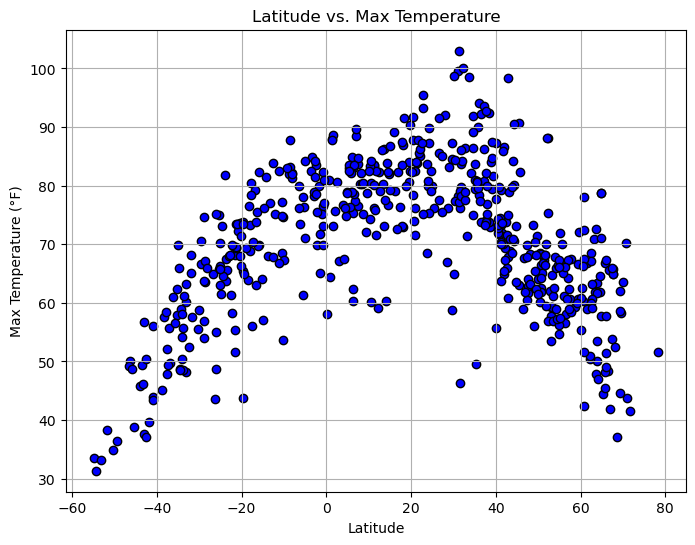

In [8]:
import matplotlib.pyplot as plt



city_data_df = pd.DataFrame(city_data)


latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

plt.figure(figsize=(8, 6))
plt.scatter(latitude, temperature, c='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Max Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

plt.show()


#### Latitude Vs. Humidity

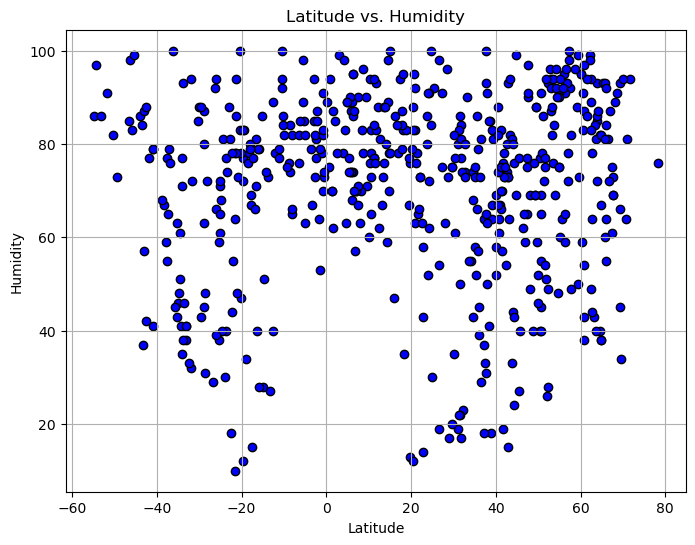

In [9]:

city_data_df = pd.DataFrame(city_data)


latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.figure(figsize=(8, 6))
plt.scatter(latitude, humidity, c='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.grid(True)


plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

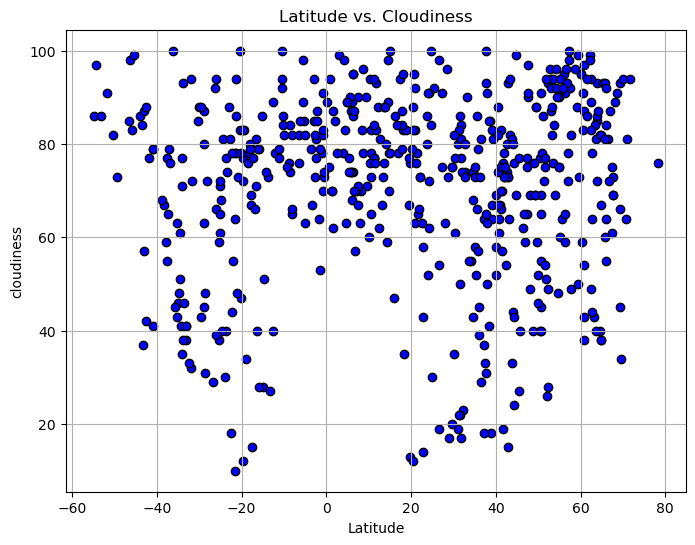

In [10]:
city_data_df = pd.DataFrame(city_data)


latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

plt.figure(figsize=(8, 6))
plt.scatter(latitude, humidity, c='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid(True)


plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

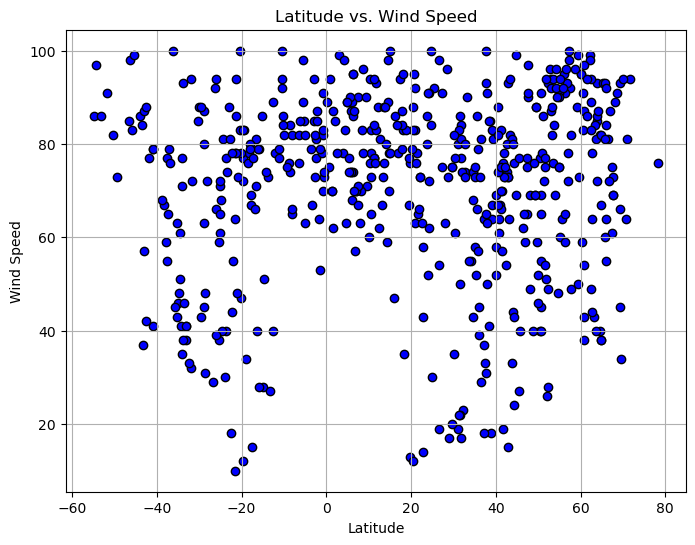

In [14]:
city_data_df = pd.DataFrame(city_data)


latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

plt.figure(figsize=(8, 6))
plt.scatter(latitude, humidity, c='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.grid(True)
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_plot(x,y,x_coord,y_coord):
    plt.scatter(x,y)
    slope, intercept, r, p, se = linregress(x, y)
    y_values=slope*x+intercept
    plt.plot(x,y_values,color="r")
    eq=f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(eq, xy =(x_coord, y_coord),color="r",fontsize=15)
    print(f"The r-value is: {r**2}")       
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,albany,42.6001,-73.9662,65.88,74,16,2.51,US,1691023437
6,priargunsk,50.3691,119.1012,60.10,77,100,14.09,RU,1691023816
7,bethel,41.3712,-73.4140,71.96,70,0,3.44,US,1691023816
10,tiksi,71.6872,128.8694,41.59,94,100,12.68,RU,1691023817
11,utrik,11.2278,169.8474,83.14,77,9,13.11,MH,1691023817


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,36.50,73,100,33.80,TF,1691023436
1,invercargill,-46.4000,168.3500,50.02,98,69,8.99,NZ,1691023461
2,puerto natales,-51.7236,-72.4875,38.35,91,100,15.52,CL,1691023444
3,ancud,-41.8697,-73.8203,39.61,77,6,4.38,CL,1691023477
5,waitangi,-43.9535,-176.5597,45.82,86,100,7.00,NZ,1691023442


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.38941205226981773


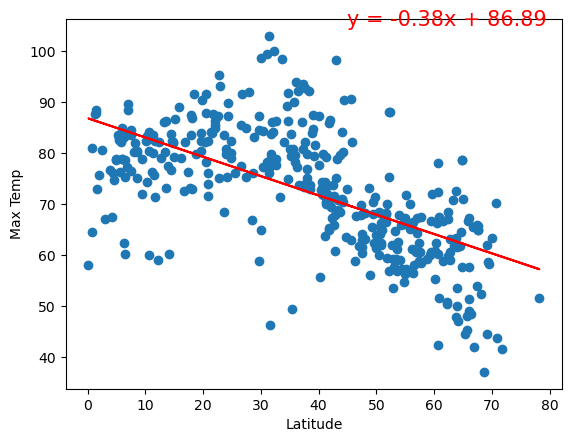

In [18]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]

linear_plot(x,y,45,105)

The r-value is: 0.6795677237565926


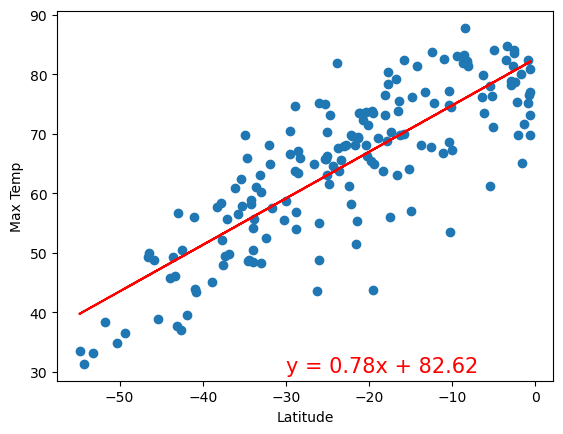

In [19]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]

linear_plot(x,y,-30,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0024457085717030334


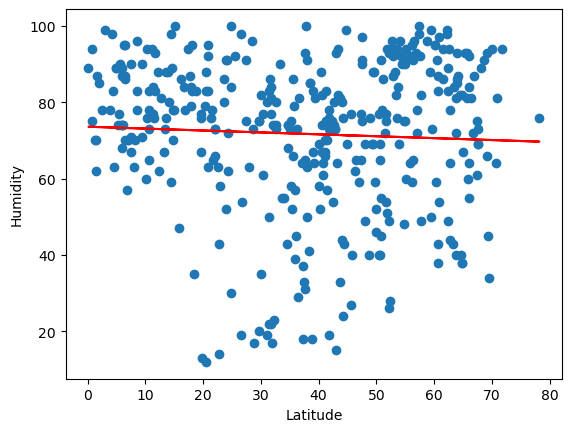

In [20]:
# Northern Hemisphere
# YOUR CODE HERE

x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]

linear_plot(x,y,45,105)

The r-value is: 0.01308026087058947


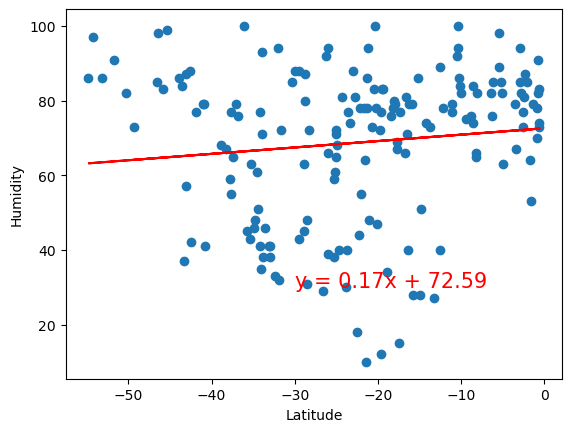

In [21]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]

linear_plot(x,y,-30,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005992185302081204


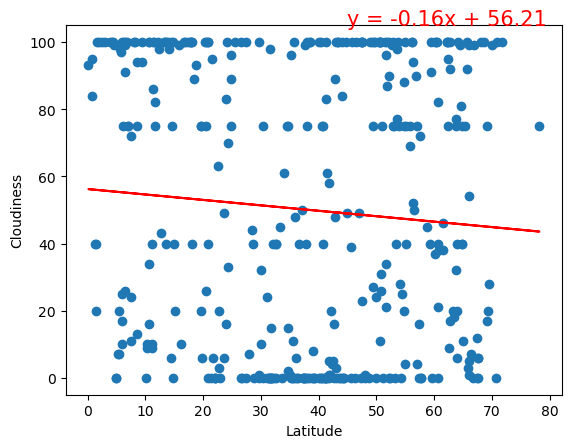

In [22]:
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]

linear_plot(x,y,45,105)

The r-value is: 0.0018711945538777424


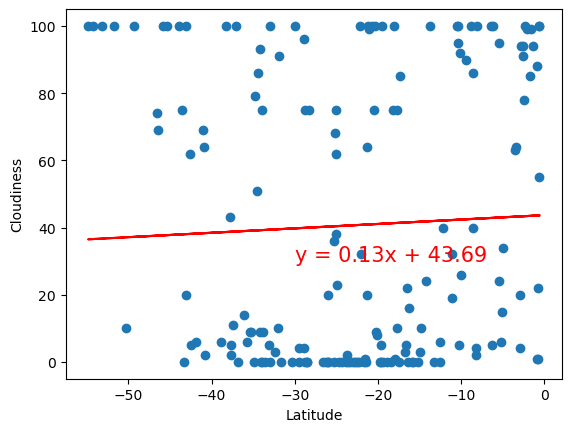

In [23]:
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]

linear_plot(x,y,-30,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006594311869056905


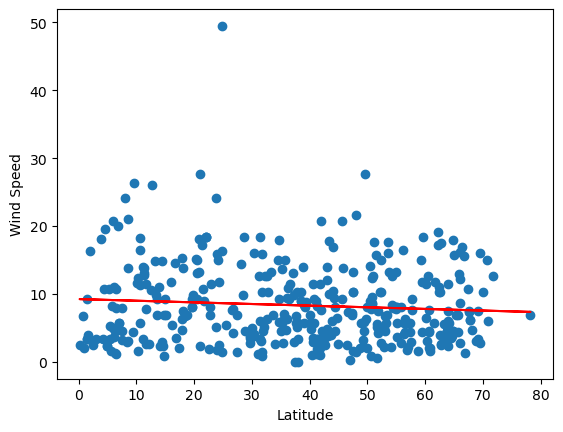

In [24]:
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]

linear_plot(x,y,45,105)

The r-value is: 0.06127524490419586


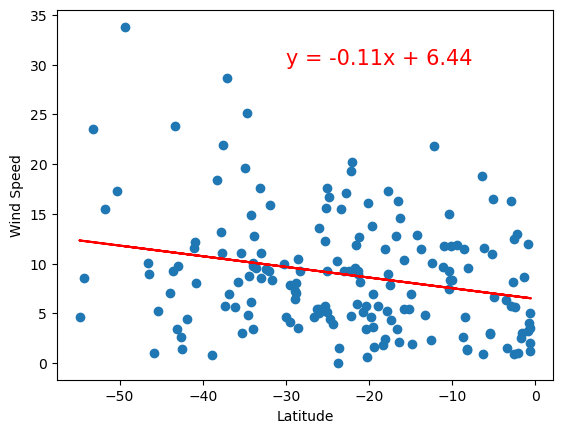

In [25]:
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]

linear_plot(x,y,-30,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE